In [78]:
from pymongo import MongoClient
from pandas import DataFrame
import pandas as pd
import numpy as np 
import csv
from datetime import datetime
from pymongo import IndexModel,ASCENDING, DESCENDING

db = MongoClient('192.168.1.190',27077).analysis

In [8]:
#选出特定字段存在的文档
#r1 = db.HoneyJarUserDataCol.find({"data.user_gray.contacts_class1_blacklist_cnt":{"$exists":True}}) 

db.ResultS5.drop()
lookup = {"$lookup":{
               "from": "HoneyJarUserDataCol",
               "localField": "mobile",
               "foreignField": "mobile",
               "as": "honeyDocs"
        }}
match = {"$match":{
                
        }}
project = {"$project":{
                "mobile":1, "isRepay":1,
                "contacts_class1_blacklist_cnt":"$honeyDocs.data.user_gray.contacts_class1_blacklist_cnt",
                "contacts_router_ratio":"$honeyDocs.data.user_gray.contacts_router_ratio",
                "contacts_class2_blacklist_cnt":"$honeyDocs.data.user_gray.contacts_class2_blacklist_cnt",
                "contacts_router_cnt":"$honeyDocs.data.user_gray.contacts_router_cnt",
                "contacts_class1_cnt":"$honeyDocs.data.user_gray.contacts_class1_cnt",
                "phone_gray_score":"$honeyDocs.data.user_gray.phone_gray_score",
                "searched_org_cnt":"$honeyDocs.data.user_searched_statistic.searched_org_cnt",
                "register_cnt":"$honeyDocs.data.user_register_orgs.register_cnt",
                "is_blacklist_name_with_phone":"$honeyDocs.data.user_blacklist.blacklist_name_with_phone",
                "is_blacklist_name_with_idcard":"$honeyDocs.data.user_blacklist.blacklist_name_with_idcard",
                "is_user_idcard_valid":"$honeyDocs.data.user_basic.user_idcard_valid",
                "user_age":"$honeyDocs.data.user_basic.user_age",
                "phone_with_other_idcards":"$honeyDocs.data.user_phone_suspicion.phone_with_other_idcards",
                "phone_with_other_names":"$honeyDocs.data.user_phone_suspicion.phone_with_other_names",
                "phone_applied_in_orgs":"$honeyDocs.data.user_phone_suspicion.phone_applied_in_orgs",
                "idcard_with_other_names":"$honeyDocs.data.user_idcard_suspicion.idcard_with_other_names",
                "idcard_with_other_phones":"$honeyDocs.data.user_idcard_suspicion.idcard_with_other_phones",
                "idcard_applied_in_orgs":"$honeyDocs.data.user_idcard_suspicion.idcard_applied_in_orgs",
                "user_searched":"$honeyDocs.data.user_searched_history_by_orgs"
}}

pipline=[lookup,project]
result = db.ResultS3.aggregate(pipline)
db.ResultS5.insert_many(result)

In [5]:
db.ResultS6.drop()
result1 = db.ResultS5.find()
db.ResultS6.insert_many(result1)

result2 = db.ResultS6.find()
for r in result2:
    db.ResultS6.update_one({"_id":r["_id"]},{"$set":{"contacts_class1_blacklist_cnt":r['contacts_class1_blacklist_cnt'][-1] if r['contacts_class1_blacklist_cnt'] != [] else '',
                                                     "contacts_router_ratio":r['contacts_router_ratio'][-1] if r['contacts_router_ratio'] != [] else '',
                                                    "contacts_class2_blacklist_cnt":r['contacts_class2_blacklist_cnt'][-1] if r['contacts_class2_blacklist_cnt'] != [] else '',
                                                    "contacts_router_cnt":r['contacts_router_cnt'][-1] if r['contacts_router_cnt'] != [] else '',
                                                    "contacts_class1_cnt":r['contacts_class1_cnt'][-1] if r['contacts_class1_cnt'] != [] else '',
                                                    "phone_gray_score":r['phone_gray_score'][-1] if r['phone_gray_score'] != [] else '',
                                                    "searched_org_cnt":r['searched_org_cnt'][-1] if r['searched_org_cnt'] != [] else '',
                                                    "register_cnt":r['register_cnt'][-1] if r['register_cnt'] != [] else '',
                                                    "is_blacklist_name_with_phone":r['is_blacklist_name_with_phone'][-1] if r['is_blacklist_name_with_phone'] != [] else '',
                                                    "is_blacklist_name_with_idcard":r['is_blacklist_name_with_idcard'][-1] if r['is_user_idcard_valid'] != [] else '',
                                                    "is_user_idcard_valid":r['is_user_idcard_valid'][-1] if r['contacts_class1_blacklist_cnt'] != [] else '',
                                                    "user_age":r['user_age'][-1] if r['user_age'] != [] else '',

                                                    "phone_with_other_idcards":len(r['phone_with_other_idcards'][-1] if r['phone_with_other_idcards'] != [] else ''),
                                                    "phone_with_other_names":len(r['phone_with_other_names'][-1] if r['phone_with_other_names'] != [] else ''),
                                                    "phone_applied_in_orgs":len(r['phone_applied_in_orgs'][-1] if r['phone_applied_in_orgs'] != [] else ''),
                                                    "idcard_with_other_names":len(r['idcard_with_other_names'][-1] if r['idcard_with_other_names'] != [] else ''),
                                                    "idcard_with_other_phones":len(r['idcard_with_other_phones'][-1] if r['idcard_with_other_phones'] != [] else ''),
                                                    "idcard_applied_in_orgs":len(r['idcard_applied_in_orgs'][-1] if r['idcard_applied_in_orgs'] != [] else ''),
                                                    "user_searched":len(r['user_searched'][-1] if r['user_searched'] != [] else '')

                                                    }})

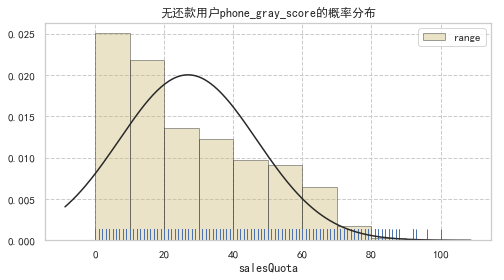

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#db.ResultS6.update_many({"phone_gray_score":''},{"$set":{"phone_gray_score":None}}) # ''不能被dropna()筛选出来，故先更新''为None
s1 = db.ResultS6.find() #ResultS6为 用户蜜罐信息
s1 = DataFrame(s1)

grouped = s1.groupby('isRepay')
s = grouped.get_group(0)
s = s['phone_gray_score'].dropna().values

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='phone_gray_score',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('无还款用户phone_gray_score的概率分布')
plt.show()

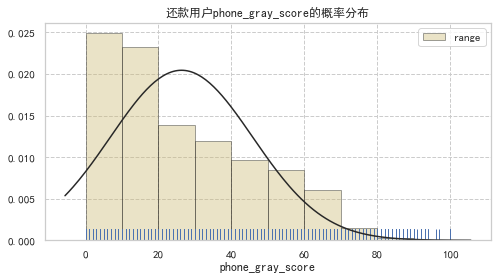

In [13]:
grouped = s1.groupby('isRepay')
s = grouped.get_group(1)
s = s['phone_gray_score'].dropna().values

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='phone_gray_score',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('还款用户phone_gray_score的概率分布')
plt.show()

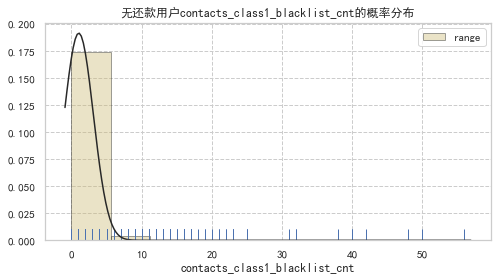

In [23]:
db.ResultS6.update_many({"contacts_class1_blacklist_cnt":''},{"$set":{"contacts_class1_blacklist_cnt":None}}) # ''不能被dropna()筛选出来，故先更新''为None
s1 = db.ResultS6.find() #ResultS6为 用户蜜罐信息
s1 = DataFrame(s1)

grouped = s1.groupby('isRepay')
s = grouped.get_group(0)
s = s['contacts_class1_blacklist_cnt'].dropna().values

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='contacts_class1_blacklist_cnt',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('无还款用户contacts_class1_blacklist_cnt的概率分布')
plt.show()

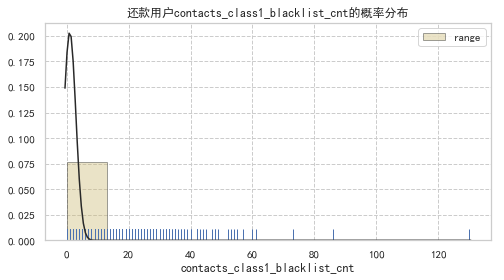

In [24]:
s = grouped.get_group(1)
s = s['contacts_class1_blacklist_cnt'].dropna().values

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='contacts_class1_blacklist_cnt',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('还款用户contacts_class1_blacklist_cnt的概率分布')
plt.show()

contacts_class1_blacklist_cnt：直接联系人在黑名单的数量，
还款用户 在5-10的比例较多，未还款用户则集中与0-5

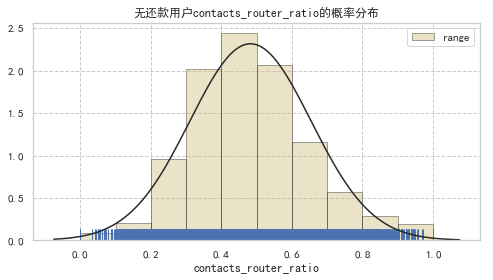

In [25]:
db.ResultS6.update_many({"contacts_router_ratio":''},{"$set":{"contacts_router_ratio":None}}) # ''不能被dropna()筛选出来，故先更新''为None
s1 = db.ResultS6.find() #ResultS6为 用户蜜罐信息
s1 = DataFrame(s1)

grouped = s1.groupby('isRepay')
s = grouped.get_group(0)
s = s['contacts_router_ratio'].dropna().values

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='contacts_router_ratio',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('无还款用户contacts_router_ratio的概率分布')
plt.show()

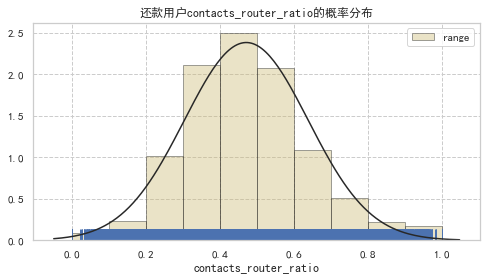

In [26]:
s = grouped.get_group(1)
s = s['contacts_router_ratio'].dropna().values

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='contacts_router_ratio',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('还款用户contacts_router_ratio的概率分布')
plt.show()

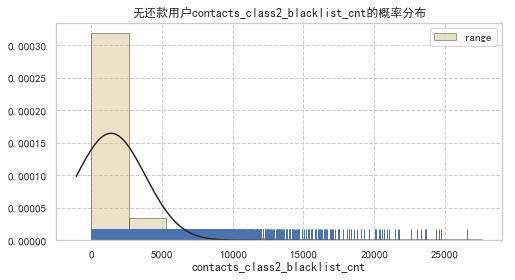

In [28]:
db.ResultS6.update_many({"contacts_class2_blacklist_cnt":''},{"$set":{"contacts_class2_blacklist_cnt":None}}) # ''不能被dropna()筛选出来，故先更新''为None
s1 = db.ResultS6.find() #ResultS6为 用户蜜罐信息
s1 = DataFrame(s1)

grouped = s1.groupby('isRepay')
s = grouped.get_group(0)
s = s['contacts_class2_blacklist_cnt'].dropna().values
s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='contacts_class2_blacklist_cnt',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('无还款用户contacts_class2_blacklist_cnt的概率分布')
plt.show()

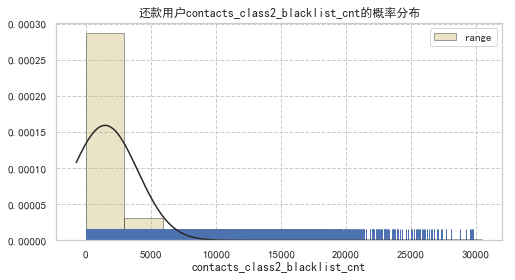

In [29]:
s = grouped.get_group(1)
s = s['contacts_class2_blacklist_cnt'].dropna().values
s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='contacts_class2_blacklist_cnt',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('还款用户contacts_class2_blacklist_cnt的概率分布')
plt.show()

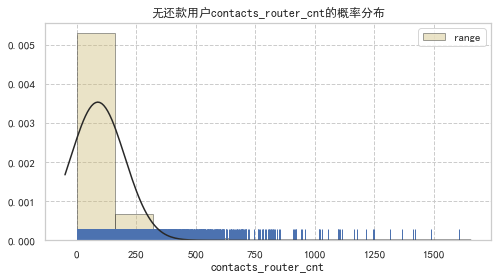

In [30]:
db.ResultS6.update_many({"contacts_router_cnt":''},{"$set":{"contacts_router_cnt":None}}) # ''不能被dropna()筛选出来，故先更新''为None
s1 = db.ResultS6.find() #ResultS6为 用户蜜罐信息
s1 = DataFrame(s1)

grouped = s1.groupby('isRepay')
s = grouped.get_group(0)
s = s['contacts_router_cnt'].dropna().values
# s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='contacts_router_cnt',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('无还款用户contacts_router_cnt的概率分布')
plt.show()

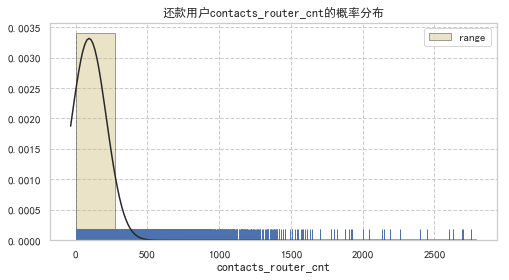

In [31]:
s = grouped.get_group(1)
s = s['contacts_router_cnt'].dropna().values
# s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='contacts_router_cnt',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('还款用户contacts_router_cnt的概率分布')
plt.show()

contacts_router_cnt 引起二阶黑名单人数
还款用户处于0-250的比例为未还款用户的一半，说明还款用户 > 250的比例比较高

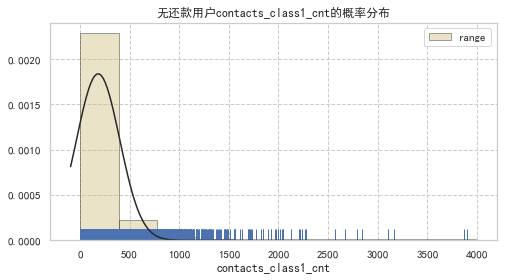

In [32]:
db.ResultS6.update_many({"contacts_class1_cnt":''},{"$set":{"contacts_class1_cnt":None}}) # ''不能被dropna()筛选出来，故先更新''为None
s1 = db.ResultS6.find() #ResultS6为 用户蜜罐信息
s1 = DataFrame(s1)

grouped = s1.groupby('isRepay')
s = grouped.get_group(0)
s = s['contacts_class1_cnt'].dropna().values
# s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='contacts_class1_cnt',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('无还款用户contacts_class1_cnt的概率分布')
plt.show()

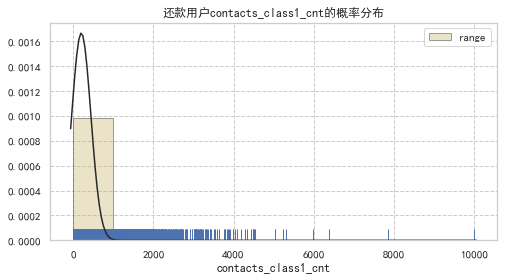

In [33]:
s = grouped.get_group(1)
s = s['contacts_class1_cnt'].dropna().values
# s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='contacts_class1_cnt',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('还款用户contacts_class1_cnt的概率分布')
plt.show()

contacts_class1_cnt：一阶联系人总数，
还款用户处于1000以上的比例较高

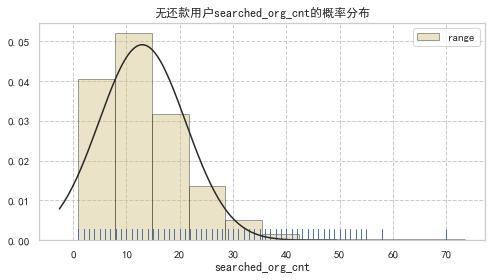

In [57]:
db.ResultS6.update_many({"searched_org_cnt":''},{"$set":{"searched_org_cnt":None}}) # ''不能被dropna()筛选出来，故先更新''为None
s1 = db.ResultS6.find() #ResultS6为 用户蜜罐信息
s1 = DataFrame(s1)

grouped = s1.groupby('isRepay')
s = grouped.get_group(0)
s = s['searched_org_cnt'].dropna().values
# s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='searched_org_cnt',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('无还款用户searched_org_cnt的概率分布')
plt.show()

[ 6. 12.  9. ...  4.  1. 15.]


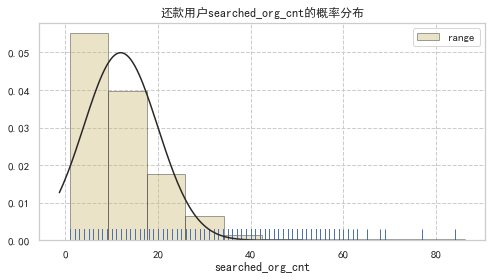

In [59]:
s = grouped.get_group(1)
s = s['searched_org_cnt'].dropna().values
# s = s[s < 30000]
print(s)
sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='searched_org_cnt',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('还款用户searched_org_cnt的概率分布')
plt.show()

未还款用户被机构查询次数偏多，主要表现在10-20偏多

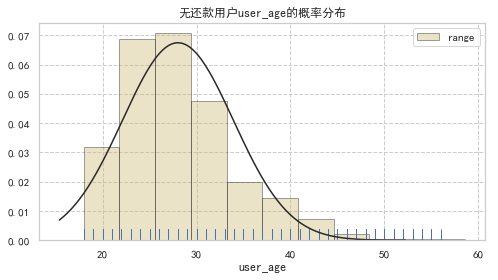

In [62]:
db.ResultS6.update_many({"user_age":''},{"$set":{"user_age":None}}) # ''不能被dropna()筛选出来，故先更新''为None
s1 = db.ResultS6.find({},{"user_age":1,"isRepay":1,"_id":0}) #ResultS6为 用户蜜罐信息
s1 = DataFrame(s1)

grouped = s1.groupby('isRepay')
s = grouped.get_group(0)
s = s["user_age"].dropna().values

# s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='user_age',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('无还款用户user_age的概率分布')
plt.show()

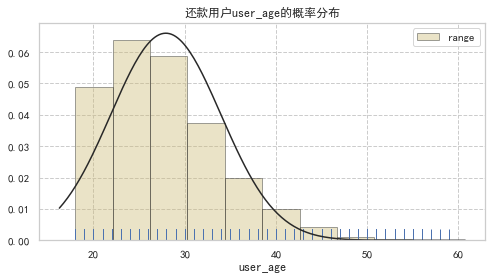

In [77]:
s = grouped.get_group(1)
s = s["user_age"].dropna().values
# s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='user_age',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('还款用户user_age的概率分布')
plt.show()

# grouped.boxplot()
# plt.show()

In [75]:
print(grouped["user_age"])

未还款用户中 22 -30岁的用户较多，故此年龄阶段的用户更容易违约，也就是说学生更不愿意违约

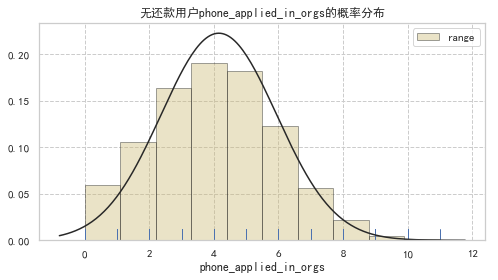

In [38]:
db.ResultS6.update_many({"phone_applied_in_orgs":''},{"$set":{"phone_applied_in_orgs":None}}) # ''不能被dropna()筛选出来，故先更新''为None
s1 = db.ResultS6.find() #ResultS6为 用户蜜罐信息
s1 = DataFrame(s1)

grouped = s1.groupby('isRepay')
s = grouped.get_group(0)
s = s['phone_applied_in_orgs'].dropna().values
# s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='phone_applied_in_orgs',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('无还款用户phone_applied_in_orgs的概率分布')
plt.show()

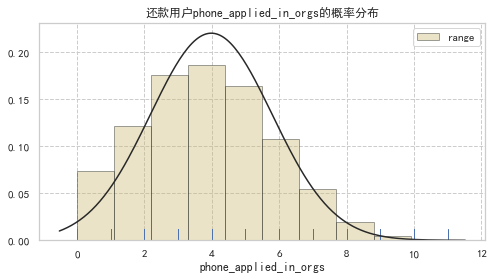

In [39]:
s = grouped.get_group(1)
s = s['phone_applied_in_orgs'].dropna().values
# s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='phone_applied_in_orgs',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('还款用户phone_applied_in_orgs的概率分布')
plt.show()

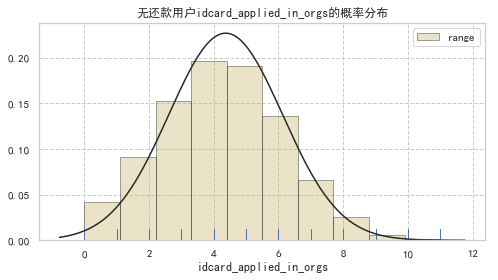

In [40]:
db.ResultS6.update_many({"idcard_applied_in_orgs":''},{"$set":{"idcard_applied_in_orgs":None}}) # ''不能被dropna()筛选出来，故先更新''为None
s1 = db.ResultS6.find() #ResultS6为 用户蜜罐信息
s1 = DataFrame(s1)

grouped = s1.groupby('isRepay')
s = grouped.get_group(0)
s = s['idcard_applied_in_orgs'].dropna().values
# s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='idcard_applied_in_orgs',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('无还款用户idcard_applied_in_orgs的概率分布')
plt.show()

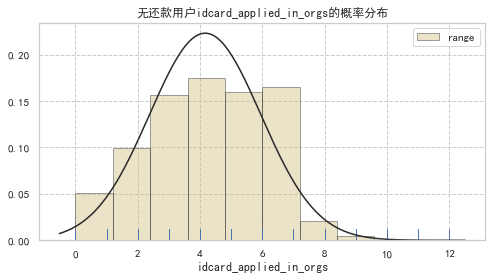

In [41]:
s = grouped.get_group(1)
s = s['idcard_applied_in_orgs'].dropna().values
# s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='idcard_applied_in_orgs',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('无还款用户idcard_applied_in_orgs的概率分布')
plt.show()

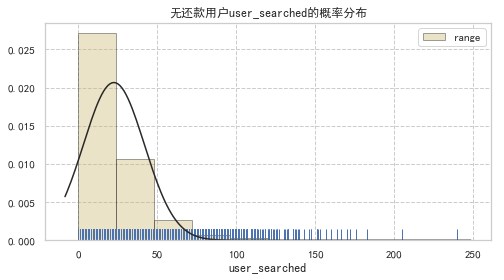

In [42]:
db.ResultS6.update_many({"user_searched":''},{"$set":{"user_searched":None}}) # ''不能被dropna()筛选出来，故先更新''为None
s1 = db.ResultS6.find() #ResultS6为 用户蜜罐信息
s1 = DataFrame(s1)

grouped = s1.groupby('isRepay')
s = grouped.get_group(0)
s = s['user_searched'].dropna().values
# s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='user_searched',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('无还款用户user_searched的概率分布')
plt.show()

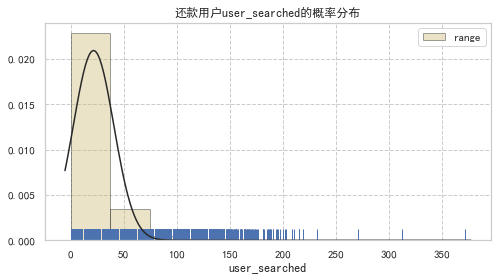

In [45]:
s = grouped.get_group(1)
s = s['user_searched'].dropna().values
# s = s[s < 30000]

sns.set(context='notebook', font= 'simhei',style='whitegrid')

plt.figure(figsize=(8,4))
sns.distplot(s,bins=10,hist=True, kde=False,norm_hist=False,
            rug=True, vertical=False,label='range',
            axlabel='user_searched',hist_kws={'color':'y','edgecolor':'k'},
            fit=norm)

plt.legend()
plt.grid(linestyle='--')
plt.title('还款用户user_searched的概率分布')
plt.show()